# Problem statment

In [ ]:
The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website.

***Dataset :***

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

***Attribute Information:***
* **Revenue** => class whether it can make a revenue or not
* **Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration** => represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
* **Bounce Rate** => percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session
* **Exit Rate** => the percentage that were the last in the session
* **Page Value** => feature represents the average value for a web page that a user visited before completing an e-commerce transaction
* **Special Day** => indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero,before and after this date unless it is close to another special day, and its maximum value of 1 on February 8
* **Operating system,browser, region, traffic type** => Different types of operating systems, browser, region and traffic type used to visit the website
* **Visitor type** => Whether the customer is a returning or new visitor
* **Weekend** => A Boolean value indicating whether the date of the visit is weekend
* **Month** => Month of the year

Let's look at our dataset in a dataframe

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/THENMOZHI/Downloads/online_shoppers_intention.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# 1)Basic Information

In [4]:
df.shape

(12330, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# 2) Checking the missing values

In [8]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [3]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

# 3)Exploratory Data Analysis

## Univariate Analysis

### Class Imbalance - Revenue(Target Variable):

Text(0, 0.5, '')

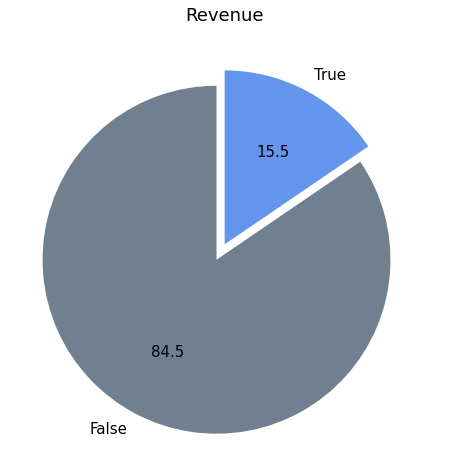

In [9]:
plt.figure(figsize=(8,8))
df['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.1,0),colors=['slategray','cornflowerblue'])
plt.title('Revenue', fontsize = 18)
plt.ylabel('')

It can be observed that there is an imbalance within the target variable. 

We will have to implement measure to sample the data correctly in order to build a good ML model.

## Analyzing the categorical variables

### Revenue

<AxesSubplot:title={'center':'Number of Customers adding Revenue'}, xlabel='Revenue', ylabel='count'>

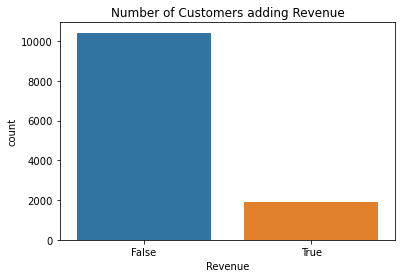

In [10]:
plt.title('Number of Customers adding Revenue')
sns.countplot(df['Revenue'])

Most of the users were not making purchase. They exist the page after visting.Only,Few customer make revenue by do purchase.

### Weekend

<AxesSubplot:xlabel='Weekend', ylabel='count'>

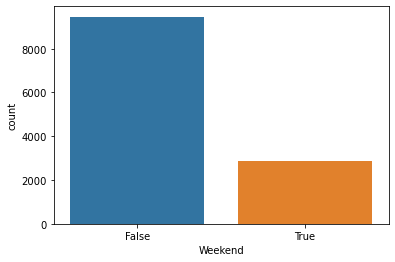

In [4]:
sns.countplot(df['Weekend'])

Purchase on weekend is very less when compared with weekdays.

<AxesSubplot:xlabel='Weekend', ylabel='count'>

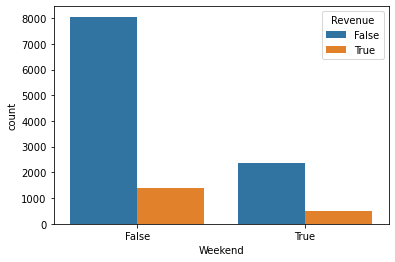

In [11]:
sns.countplot(df['Weekend'],hue=df['Revenue'])

Most of the customers not making purchases on weekend.They do purchase on week days.

### VisitorType

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

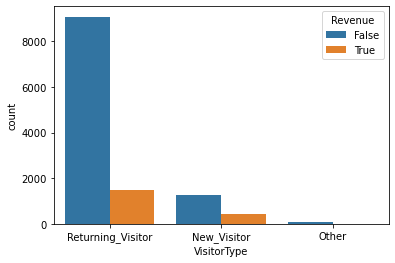

In [12]:
sns.countplot(df['VisitorType'],hue=df['Revenue'])

Most of the cutomers visiting the website are Returning visitors, contributing to most number of purchases.
There are more returning visitors among those who do not complete the purchase.

### Month

<AxesSubplot:xlabel='Month', ylabel='count'>

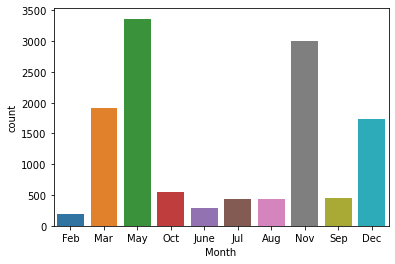

In [13]:
sns.countplot(df['Month'])

<AxesSubplot:xlabel='Month', ylabel='count'>

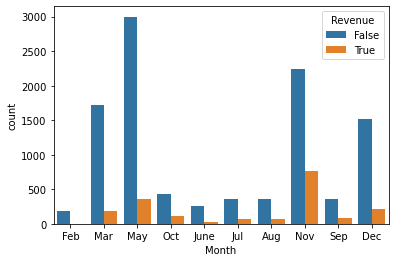

In [14]:
sns.countplot(df['Month'],hue=df['Revenue'])

The customers are mostly active in the month of November,May,Decembe,March. Most of the purchases happened on this four month.

## Analyzing the numerical variables

### Administrative

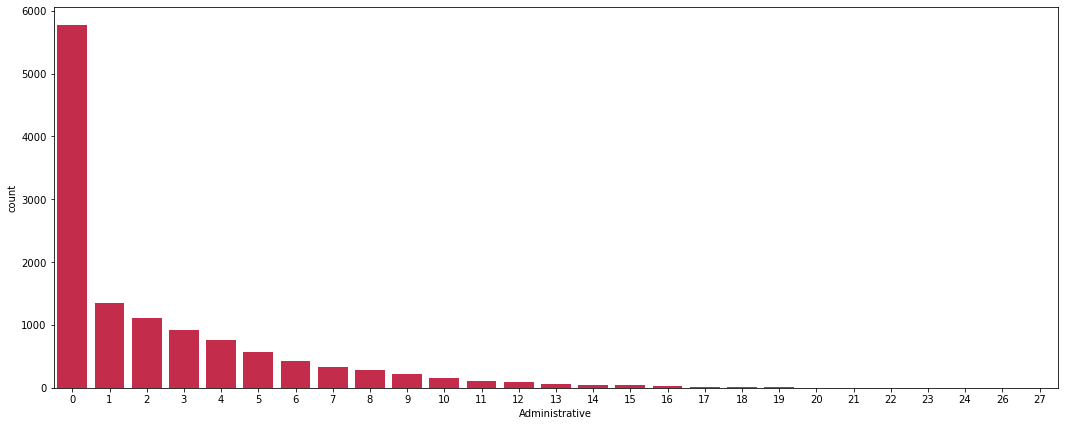

In [15]:
plt.figure(figsize = (18,7))
sns.countplot(df['Administrative'], color = "crimson")
plt.show()

Majority of the users don't spend much time on the Administrative pages which might a sign of a good website design.

### Administrative_Duration

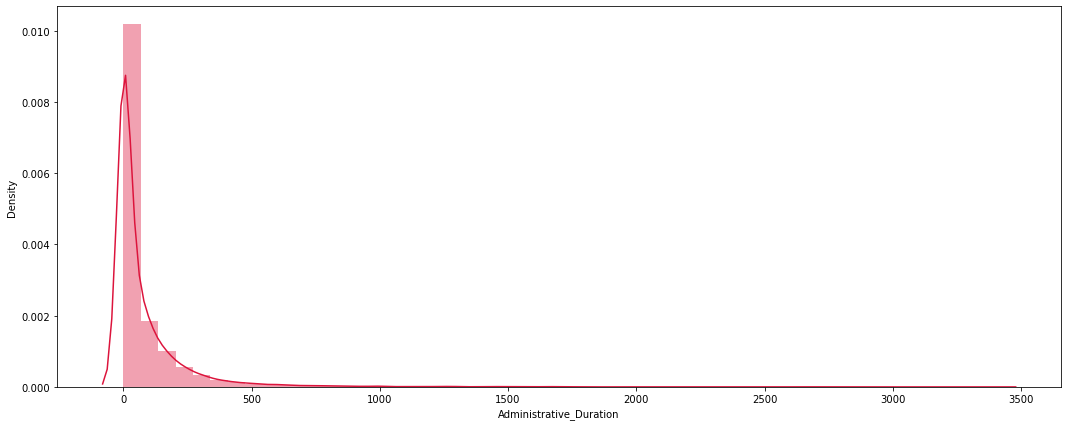

In [16]:
plt.figure(figsize = (18,7))
sns.distplot(df['Administrative_Duration'], color = "crimson")
plt.show()

The distribution for Administrative_Duration is right skewed. A good no. of users do spend time on the Administratve pages.

### Informational

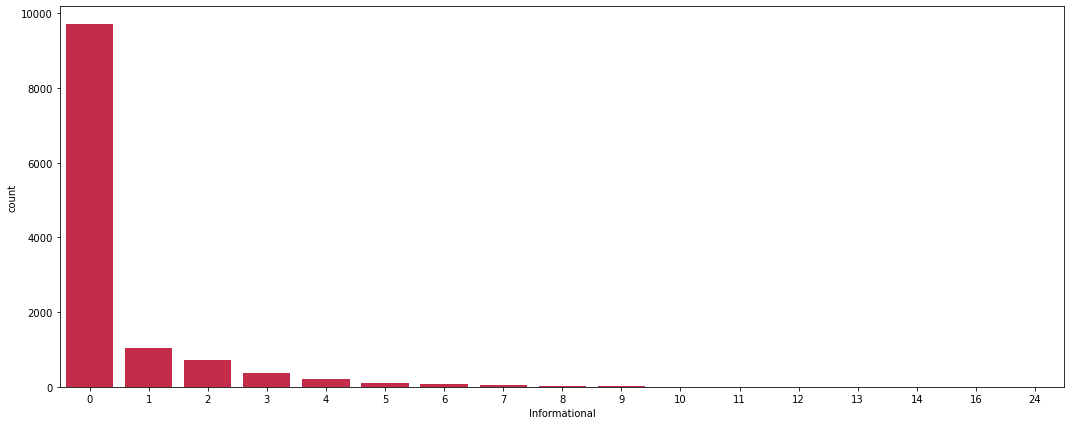

In [17]:
plt.figure(figsize = (18,7))
sns.countplot(df['Informational'], color = "crimson")
plt.show()

Majority of the users doesn't spend time on Informational pages however we do have users who checks out multiple pages. Now the question if its the website's 'ABOUT' section or Google serach pages

## ProductRelated

<AxesSubplot:xlabel='ProductRelated', ylabel='Density'>

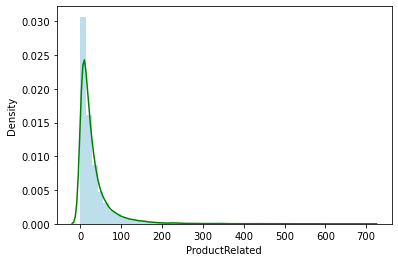

In [20]:
sns.distplot(df['ProductRelated'],
             kde_kws={"color":"green","lw":1.5,"alpha":0.8},
             hist_kws={"color":"lightblue","alpha":0.8})

## BounceRates

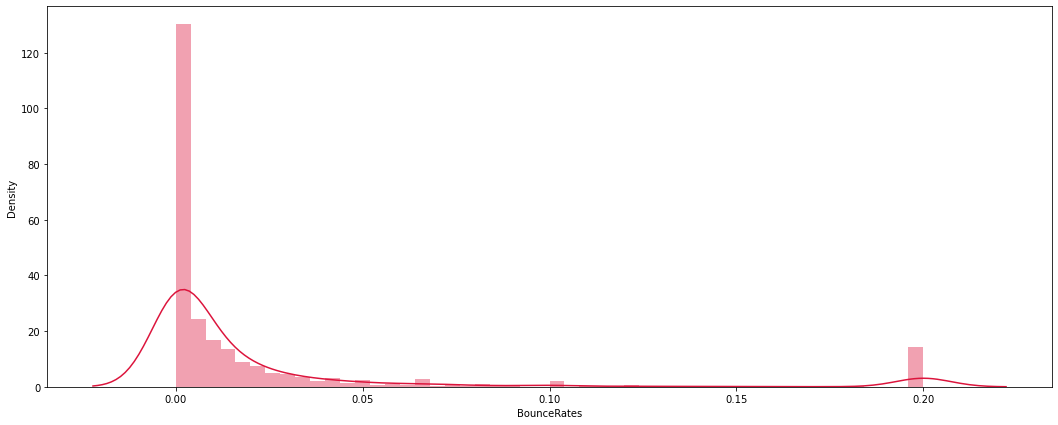

In [21]:
plt.figure(figsize = (18,7))
sns.distplot(df['BounceRates'], color = "crimson")
plt.show()

For effective revenue making, low bounce rate and low exist rate will be the key factor

<AxesSubplot:xlabel='BounceRates', ylabel='Density'>

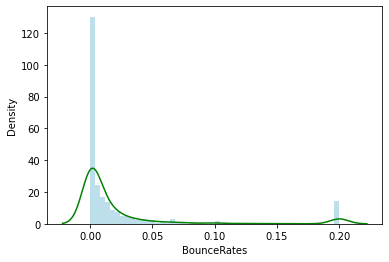

In [22]:
sns.distplot(df['BounceRates'],
             kde_kws={"color":"green","lw":1.5,"alpha":0.8},
             hist_kws={"color":"lightblue","alpha":0.8})

## ExitRates

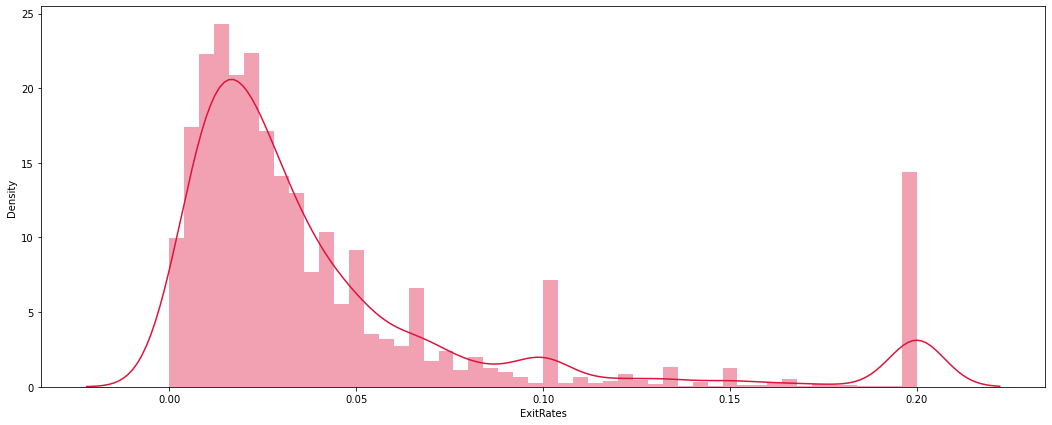

In [23]:
plt.figure(figsize = (18,7))
sns.distplot(df['ExitRates'], color = "crimson")
plt.show()

For effective revenue making, low bounce rate and low exist rate will be the key factor

## SpecialDay

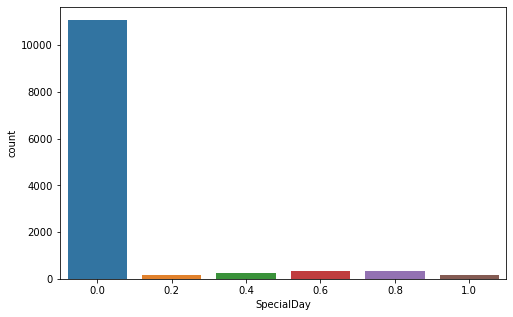

In [8]:
plt.figure(figsize = (8,5))

sns.countplot(df['SpecialDay'])
plt.show()

From below closeness to Special Day is not having much affect on revenue generation.

## OperatingSystems

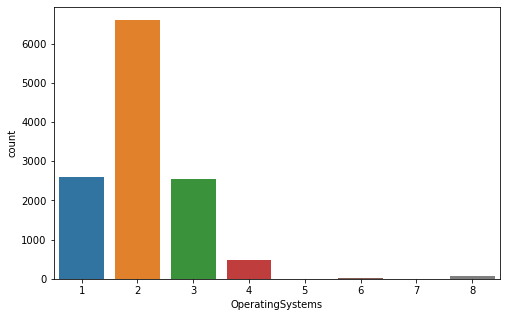

In [25]:
plt.figure(figsize = (8,5))
sns.countplot(df['OperatingSystems'])
plt.show()

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(df['OperatingSystems'],)
plt.show()

Type 2 operating system is the highest revenue making os.

## Browser

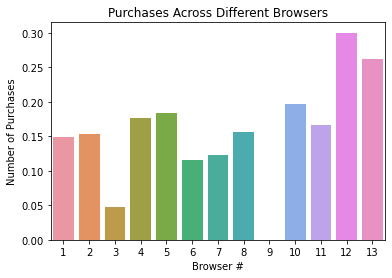

In [6]:
sns.barplot(df.groupby(by = 'Browser').mean().index, df.groupby(by = 'Browser').mean().Revenue)
plt.title("Purchases Across Different Browsers")
plt.xlabel("Browser #")
plt.ylabel("Number of Purchases")
plt.show()

30% of users who use Browser #12 also completed a purchase. 

## Region

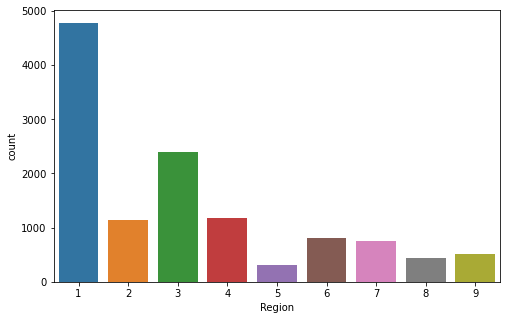

In [27]:
plt.figure(figsize = (8,5))
sns.countplot(df['Region'])
plt.show()

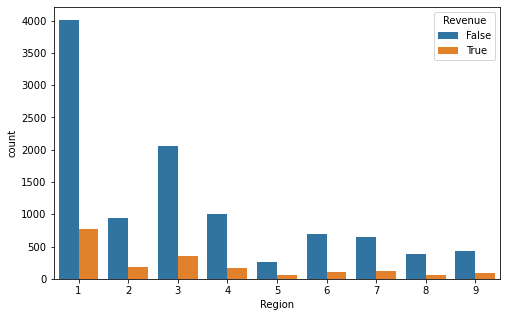

In [28]:
plt.figure(figsize = (8,5))
sns.countplot(df['Region'],hue=df["Revenue"])
plt.show()

## TrafficType

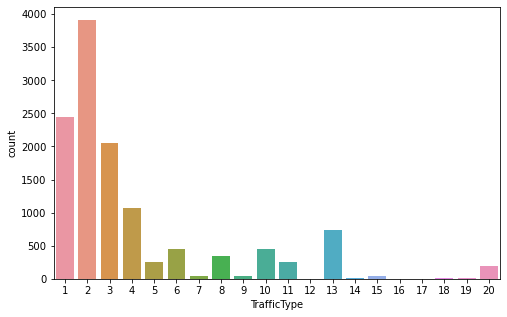

In [29]:
plt.figure(figsize = (8,5))
sns.countplot(df['TrafficType'])
plt.show()

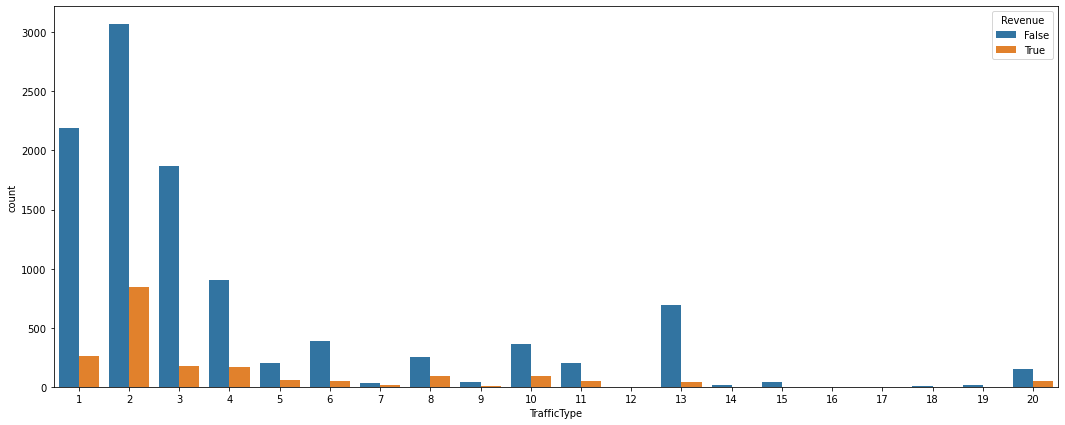

In [30]:
plt.figure(figsize = (18,7))
sns.countplot(df['TrafficType'],hue=df["Revenue"])
plt.show()

In [ ]:
Type 2 is making the highest revenue.

## Bivariate Analysis

array([[<AxesSubplot:title={'center':'Administrative'}>,
        <AxesSubplot:title={'center':'Administrative_Duration'}>,
        <AxesSubplot:title={'center':'Informational'}>,
        <AxesSubplot:title={'center':'Informational_Duration'}>],
       [<AxesSubplot:title={'center':'ProductRelated'}>,
        <AxesSubplot:title={'center':'ProductRelated_Duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>],
       [<AxesSubplot:title={'center':'PageValues'}>,
        <AxesSubplot:title={'center':'SpecialDay'}>,
        <AxesSubplot:title={'center':'OperatingSystems'}>,
        <AxesSubplot:title={'center':'Browser'}>],
       [<AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'TrafficType'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

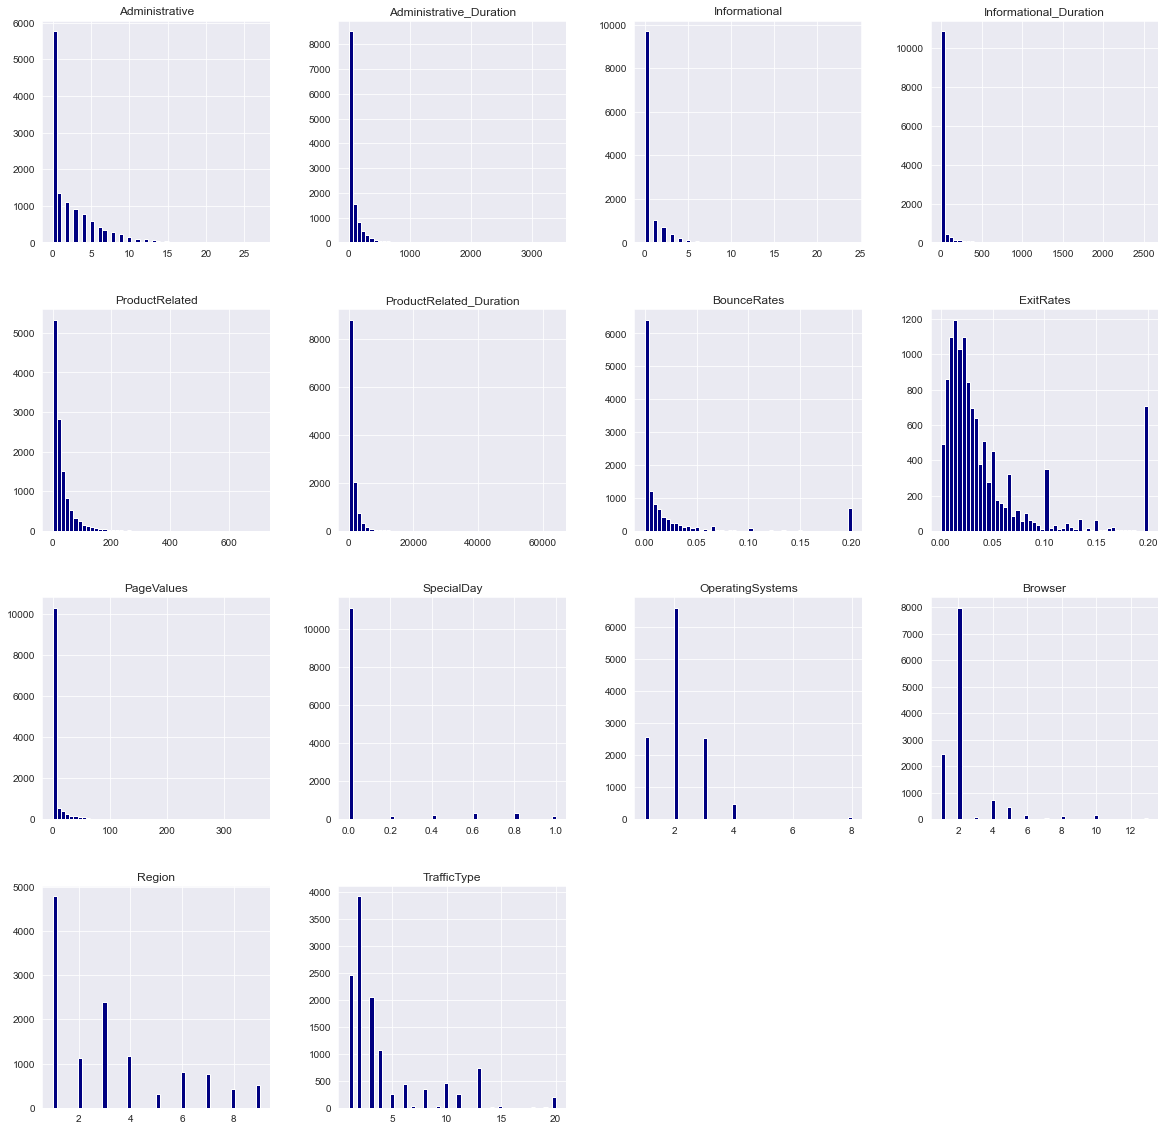

In [31]:
sns.set_style('dark')
df.hist(bins=50,figsize=(20,20),color='navy')

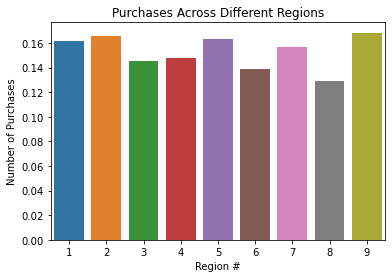

In [7]:
sns.barplot(df.groupby(by = 'Region').mean().index, df.groupby(by = 'Region').mean().Revenue)
plt.title("Purchases Across Different Regions")
plt.xlabel("Region #")
plt.ylabel("Number of Purchases")
plt.show()

More than 16% of users who came from Regions 1, 2, 5, and 9 also completed a purchase.

### Duration of pages vs Revenue

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

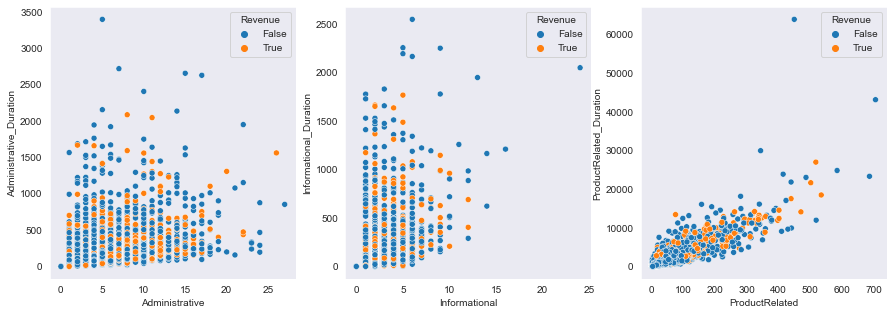

In [32]:
plt.figure(figsize = (15, 5))
#plt.style.use('seaborn-white')
plt.subplot(131)
sns.scatterplot(x="Administrative", y="Administrative_Duration",hue="Revenue", data=df)
plt.subplot(132)
sns.scatterplot(x="Informational", y="Informational_Duration",hue="Revenue", data=df)
plt.subplot(133)
sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration",hue="Revenue", data=df)

High duration users are found for the initial types of pages (0-15: Administrative;0-10:Informational;0-300:Product Related)
Revenue hasn't been generated for the latter types
There is a linear relationship between product_related and Product duration (multicollinearity)

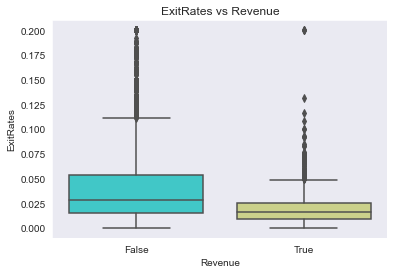

In [33]:
# Cat Vs Num
#plt.figure(figsize = (25,18))
sns.boxplot(df['Revenue'], df['ExitRates'], palette = 'rainbow')
plt.title('ExitRates vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('ExitRates')
plt.show()

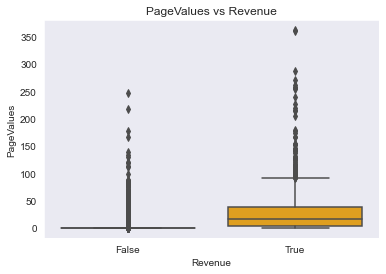

In [34]:
# Cat Vs Num
# page values vs revenue
#plt.figure(figsize = (15,9))
sns.boxplot(df['Revenue'], df['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('PageValues')
plt.show()

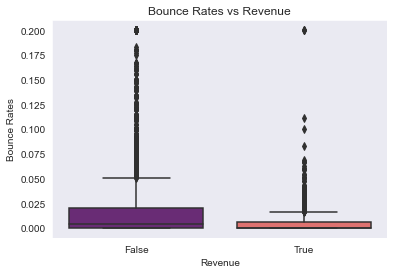

In [35]:
# Cat Vs Num
# bounce rates vs revenue

#plt.figure(figsize = (15,9))
sns.boxplot(df['Revenue'], df['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Bounce Rates')
plt.show()

For effective revenue genration low bounce rates, low exit rates and high page values hold the key.

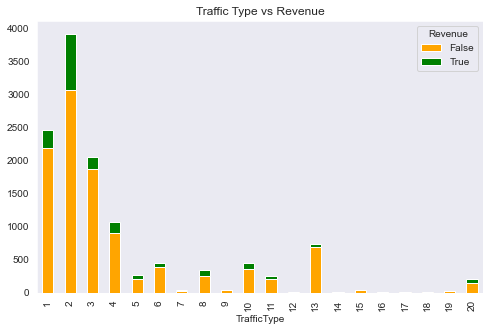

In [36]:
# Cat vs Cat
# Traffic Type vs Revenue
data = pd.crosstab(df['TrafficType'], df['Revenue'])
data.plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['orange', 'green'])
plt.title('Traffic Type vs Revenue')
plt.show()

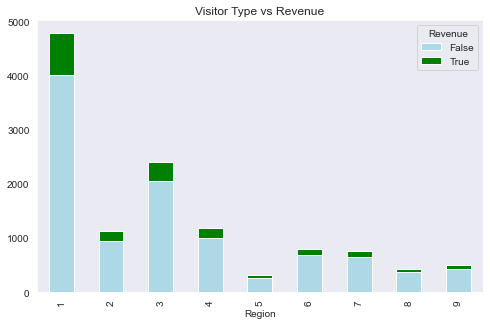

In [37]:
# Cat vs Cat
# Region vs revenue
data = pd.crosstab(df['Region'], df['Revenue'])
data.plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['lightblue', 'green'])
plt.title('Visitor Type vs Revenue')
plt.show()

## Muti-Variate Analysis

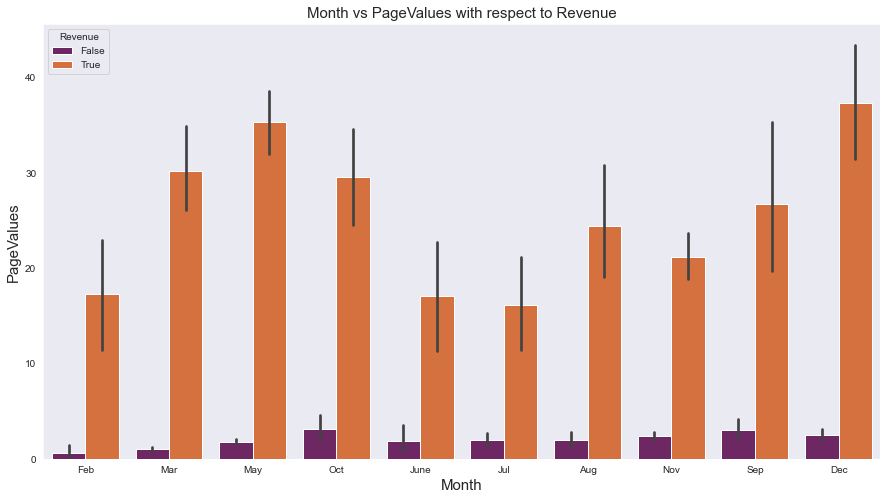

In [38]:
# month vs pagevalues with respect to revenue
plt.figure(figsize = (15,8))
sns.barplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = 'inferno')
plt.title('Month vs PageValues with respect to Revenue', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('PageValues', fontsize = 15)
plt.show()

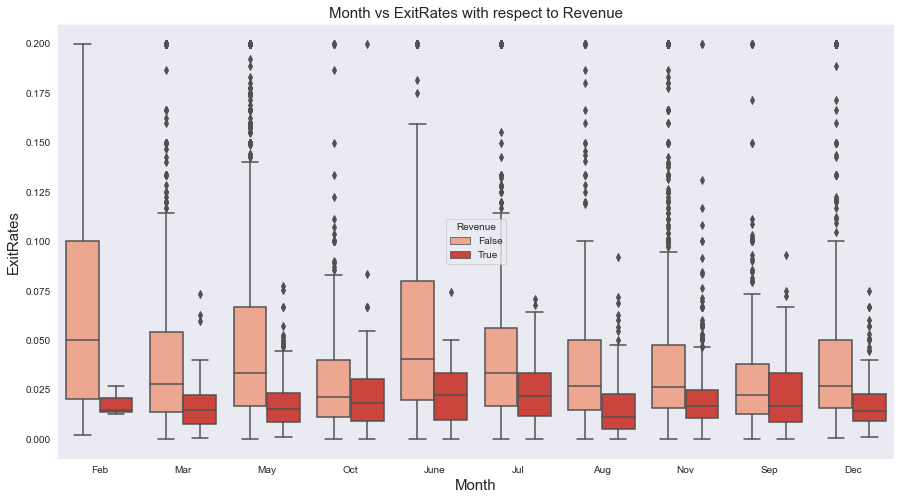

In [39]:
# month vs exitrates with respect to revenue
plt.figure(figsize = (15,8))
#plt.subplot(2, 2, 2)
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'Reds')
plt.title('Month vs ExitRates with respect to Revenue', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('ExitRates', fontsize = 15)
plt.show()

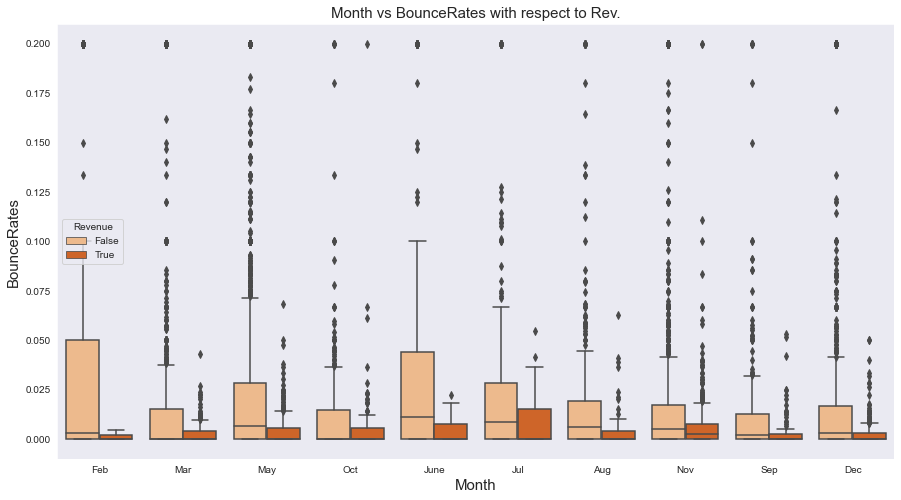

In [40]:
# month vs bouncerates with respect to revenue
plt.figure(figsize = (15,8))
sns.boxplot(x = df['Month'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Oranges')
plt.title('Month vs BounceRates with respect to Rev.', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('BounceRates', fontsize = 15)
plt.show()

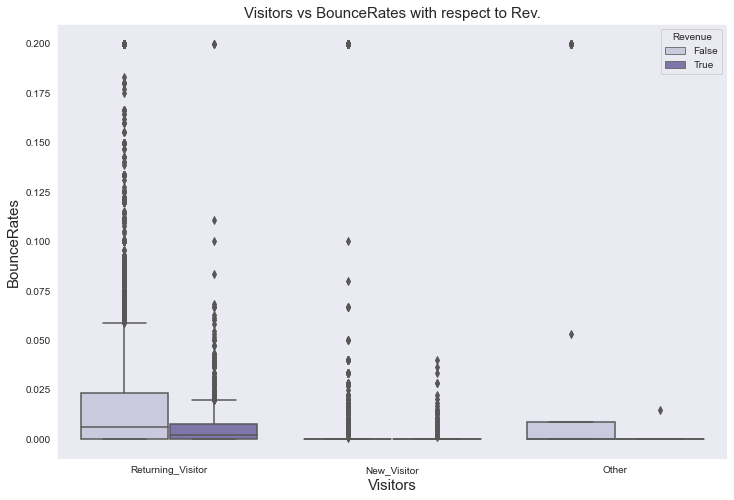

In [41]:
# VisitorType vs Bouncerates with respect to revenue
plt.figure(figsize = (12,8))
sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates with respect to Rev.', fontsize = 15)
plt.xlabel('Visitors', fontsize = 15)
plt.ylabel('BounceRates', fontsize = 15)
plt.show()

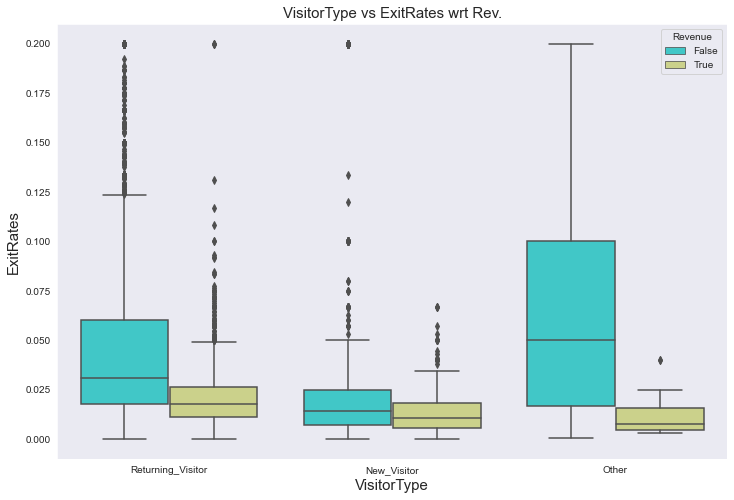

In [42]:
# visitor type vs exit rates w.r.t revenue
plt.figure(figsize = (12,8))
sns.boxplot(x = df['VisitorType'], y = df['ExitRates'], hue = df['Revenue'], palette = 'rainbow')
plt.title('VisitorType vs ExitRates wrt Rev.', fontsize = 15)
plt.xlabel('VisitorType', fontsize = 15)
plt.ylabel('ExitRates', fontsize = 15)
plt.show()

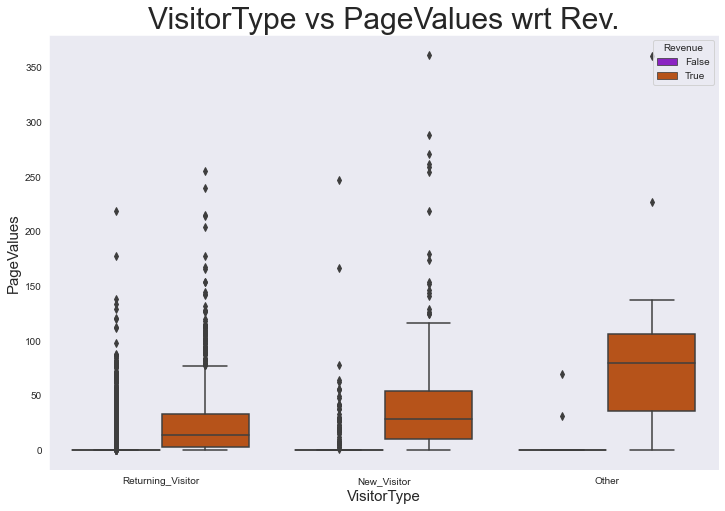

In [43]:
# visitor type vs exit rates w.r.t revenue
plt.figure(figsize = (12,8))
sns.boxplot(x = df['VisitorType'], y = df['PageValues'], hue = df['Revenue'], palette = 'gnuplot')
plt.title('VisitorType vs PageValues wrt Rev.', fontsize = 30)
plt.xlabel('VisitorType', fontsize = 15)
plt.ylabel('PageValues', fontsize = 15)
plt.show()

## Correlation Coefficient

<AxesSubplot:>

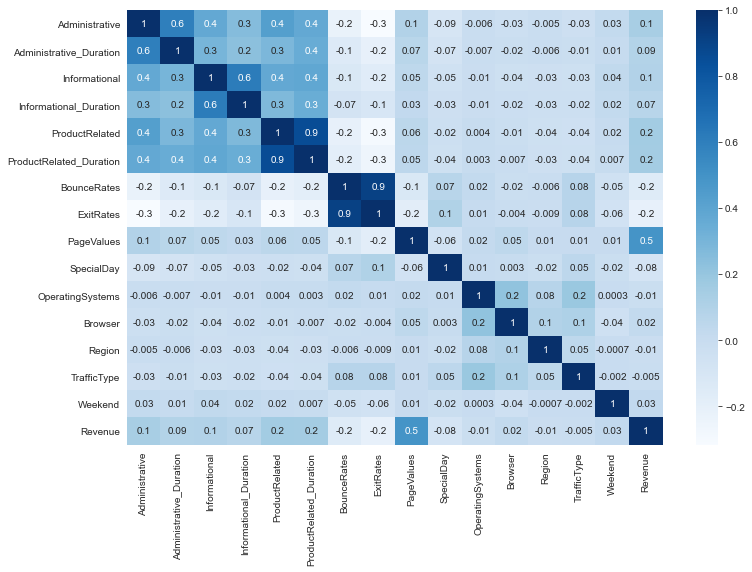

In [44]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True,fmt='.1g',cmap='Blues')

There is a high correlation with page values and revenue
Bounces rates got negative influence on revenue
Pages which has high bounce rates tends to have high exit rates as well
The website earns a lot of revenue from product related pages

# 4)Data Preprocessing & Feature Engineering 

## Handling Outliers

Text(0.5, 1.0, 'PageValues')

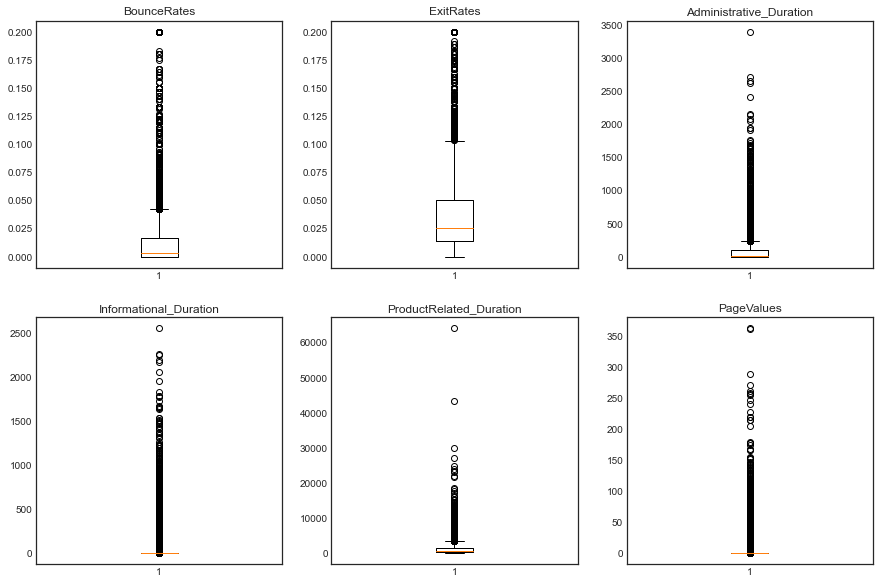

In [5]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(231)
plt.boxplot(df['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(232)
plt.boxplot(df['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(233)
plt.boxplot(df['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(234)
plt.boxplot(df['Informational_Duration'])
ax.set_title('Informational_Duration')
ax=plt.subplot(235)
plt.boxplot(df['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')
ax=plt.subplot(236)
plt.boxplot(df['PageValues'])
ax.set_title('PageValues')

we have a lot of outliers, if you notice informational_duration and page values, they don't have any distribution and if you remove the outliers there will be one value left in it. So except that two features, we are removing the outliers via IQR method

In [6]:
df1 = df.copy()

In [7]:
numerical_features=['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration']
for cols in numerical_features:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df=df.loc[filter]

Text(0.5, 1.0, 'ProductRelated_Duration')

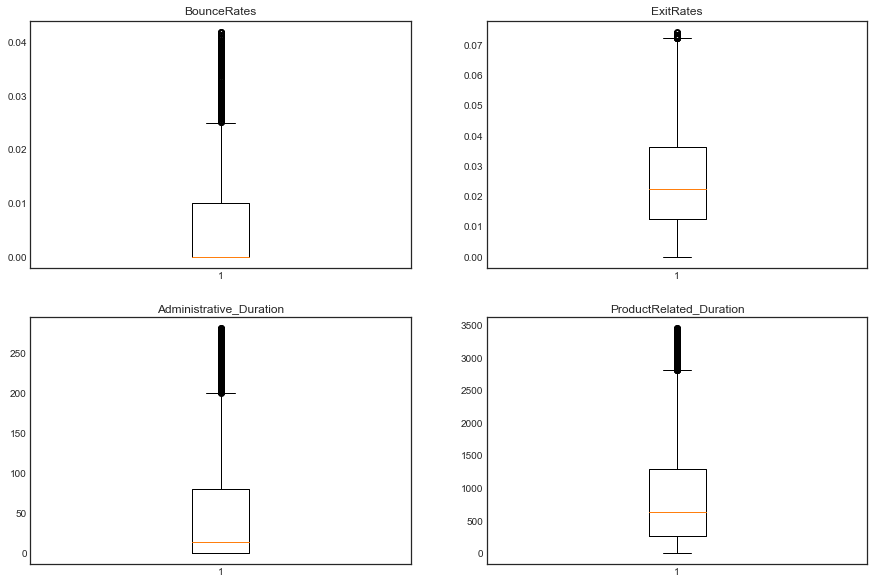

In [8]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(222)
plt.boxplot(df['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(223)
plt.boxplot(df['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(224)
plt.boxplot(df['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')

We have removed a good number of outliers !

<a id="subsection-fourteen"></a>
##  Special Day- Feature Clubbing 
Here I'm planning to club the special day feature which has 0.2,0.4,0.6,0.8,1 . So let's club the values and replace the values based on a condition. These are probability values, so
* If it is greater than 0.4 it is '1' which indicates it is a 'Special day'. 
* If it is less than or equal to 0.4 it is 0 which indicates 'Not a Special day'

In [9]:
df.loc[df['SpecialDay'] > 0.4, 'SpecialDay'] = 1
df.loc[df['SpecialDay'] <= 0.4, 'SpecialDay'] = 0
df['SpecialDay'].value_counts()

0.0    8240
1.0     518
Name: SpecialDay, dtype: int64

Now, let's change the values into boolean as it makes more sense
* 1-True-Special Day
* 0-False-Not a Special Day

In [10]:
df['SpecialDay']=df['SpecialDay'].astype('bool')
df['SpecialDay'].value_counts()

False    8240
True      518
Name: SpecialDay, dtype: int64

<a id="subsection-fifteen"></a>
## Converting Dtypes 
Since we have catgorical variables which are identified as numerical. I guess it is better to convert them to categories

In [11]:
for cols in ['Administrative','Informational','ProductRelated','OperatingSystems','Browser',
             'Region','TrafficType','VisitorType']:
    df[cols] = df[cols].astype('category')

In [12]:
df.dtypes

Administrative             category
Administrative_Duration     float64
Informational              category
Informational_Duration      float64
ProductRelated             category
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                     bool
Month                        object
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object

<a id="subsection-sixteen"></a>
##  Feature Scaling
Let's standardize our numerical features as we have more outliers

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [14]:
Categorical_variables=['Weekend','Revenue','Administrative','Informational','ProductRelated','SpecialDay',
 'OperatingSystems','Browser','Region','Month','TrafficType','VisitorType']


feature_scale=[feature for feature in df.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(df[feature_scale])

StandardScaler()

In [15]:
scaled_data = pd.concat([df[['Weekend','Revenue','Administrative','Informational',
                                    'ProductRelated','SpecialDay','OperatingSystems',
                                    'Browser','Region','Month','TrafficType','VisitorType']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,True,False,0,0,10,False,3,3,1,Feb,4,Returning_Visitor,-0.729479,-0.228638,-0.323099,1.425002,1.421103,-0.330977
1,False,False,0,0,19,False,2,2,1,Feb,3,Returning_Visitor,-0.729479,-0.228638,-0.917399,0.987920,-0.079715,-0.330977
2,False,False,0,0,3,False,2,4,1,Feb,2,Returning_Visitor,-0.729479,-0.228638,-0.184345,-0.651135,-0.217722,-0.330977
3,False,False,0,0,3,False,1,1,3,Feb,3,Returning_Visitor,-0.729479,-0.228638,-0.615048,-0.651135,2.404398,-0.330977
4,False,False,0,0,16,False,1,1,4,Feb,3,Returning_Visitor,-0.729479,-0.228638,-0.599038,1.295243,-0.004674,-0.330977



We have scaled our numerical features using standard scaler

<a id="subsection-seventeen"></a>
##  Label Encoding
Let's encode our month feature using Label encoder

In [16]:

encoded_features=['Month','VisitorType']

label_data = scaled_data.copy()
label_encoder = LabelEncoder()
for col in encoded_features:
    label_data[col] = label_encoder.fit_transform(scaled_data[col])
    
label_data.head()

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,True,False,0,0,10,False,3,3,1,2,4,2,-0.729479,-0.228638,-0.323099,1.425002,1.421103,-0.330977
1,False,False,0,0,19,False,2,2,1,2,3,2,-0.729479,-0.228638,-0.917399,0.987920,-0.079715,-0.330977
2,False,False,0,0,3,False,2,4,1,2,2,2,-0.729479,-0.228638,-0.184345,-0.651135,-0.217722,-0.330977
3,False,False,0,0,3,False,1,1,3,2,3,2,-0.729479,-0.228638,-0.615048,-0.651135,2.404398,-0.330977
4,False,False,0,0,16,False,1,1,4,2,3,2,-0.729479,-0.228638,-0.599038,1.295243,-0.004674,-0.330977


We have encoded the required features, Let's prune our features through Feature selection

# Feature Importance using Random Forest


Let's check the feature importances and prune our features to make our model perform well. 

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
X=label_data.drop(['Revenue'],axis=1)
y=label_data.Revenue

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [18]:
print(model.feature_importances_)

[0.01524797 0.04337075 0.02697898 0.05782286 0.00437595 0.03008609
 0.03164049 0.04329392 0.04858863 0.04415203 0.01458801 0.04725403
 0.025146   0.06689532 0.04267788 0.06577378 0.39210731]


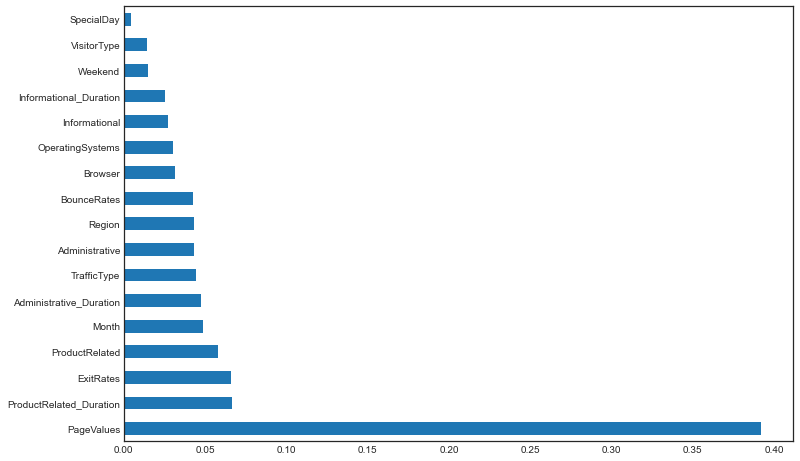

In [19]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize = (12,8))
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

From the bar plot we can see the importances of features based on it's impact towards output. Let's  take up the top 14 features 

<a id="subsection-nineteen"></a>
## 5)SMOTE(Balancing the dataset)
Let's drop the required features and split the data into train and test

In [20]:
from sklearn.model_selection import train_test_split
X=label_data.drop(['SpecialDay','VisitorType','Weekend','Revenue'],axis=1)
y=label_data.Revenue

In [21]:
from imblearn.over_sampling import RandomOverSampler
smote=RandomOverSampler()
X_new,y_new=smote.fit_resample(X,y)

In [22]:
pd.Series(y_new).value_counts() #Target after smote

False    7313
True     7313
Name: Revenue, dtype: int64

In [23]:
pd.Series(y).value_counts() #target before Smote

False    7313
True     1445
Name: Revenue, dtype: int64

# 6) Train Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (7006, 14)
Input Test: (1752, 14)
Output Training: (7006,)
Output Test: (1752,)


# Model Building

In [25]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


In [26]:
scoring = 'accuracy'
df['Revenue'].value_counts(normalize=True)

False    0.835008
True     0.164992
Name: Revenue, dtype: float64

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

In [40]:
#Evaluation metric for logistic regression
print('Confusion matrix:\n',confusion_matrix(y_test,logpred))

print('Accuracy Score: '+str(accuracy_score(y_test, logpred).round(2)))
print('Precision Score: '+str(precision_score(y_test, logpred).round(2)))
print('Recall Score: '+str(recall_score(y_test, logpred).round(2)))
print('F1 Score: '+str(f1_score(y_test, logpred).round(2)))
print('AUC Score: '+str(roc_auc_score(y_test, logpred).round(2)))


print('Cohen kappa Score: ',+round(cohen_kappa_score(y_test, logpred),2))
log_kappa = round(cohen_kappa_score(y_test, logpred),2)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring)).mean().round(2)
print("Cross Validation Score",LOGCV)

Confusion matrix:
 [[1423   35]
 [ 172  122]]
Accuracy Score: 0.88
Precision Score: 0.78
Recall Score: 0.41
F1 Score: 0.54
AUC Score: 0.7
Cohen kappa Score:  0.48
Cross Validation Score 0.89


In [ ]:
#ROC/AUC curve
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

plt.plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Logistic ',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

In [44]:
#Evaluation metric for Decision Tree

print('Confusion matrix:\n',confusion_matrix(y_test,dtreepred))

print('Accuracy Score: '+str(accuracy_score(y_test, dtreepred).round(2)))
print('Precision Score: '+str(precision_score(y_test, dtreepred).round(2)))
print('Recall Score: '+str(recall_score(y_test, dtreepred).round(2)))
print('F1 Score: '+str(f1_score(y_test, dtreepred).round(2)))
print('AUC Score: '+str(roc_auc_score(y_test, dtreepred).round(2)))

print('Cohen kappa Score: ',+round(cohen_kappa_score(y_test, dtreepred),2))
dec_kappa = round(cohen_kappa_score(y_test, dtreepred),2)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring).mean()).round(2)
print("Cross Validation Score",DTREECV)

Confusion matrix:
 [[1338  120]
 [ 121  173]]
Accuracy Score: 0.86
Precision Score: 0.59
Recall Score: 0.59
F1 Score: 0.59
AUC Score: 0.75
Cohen kappa Score:  0.51
Cross Validation Score 0.86


# Random Tree

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

In [57]:
#Evaluation metric for Random Forest

print('Confusion matrix:\n',confusion_matrix(y_test,rfcpred))


print('Accuracy Score: '+str(accuracy_score(y_test, rfcpred).round(2)))
print('Precision Score: '+str(precision_score(y_test, rfcpred).round(2)))
print('Recall Score: '+str(recall_score(y_test, rfcpred).round(2)))
print('F1 Score: '+str(f1_score(y_test, rfcpred).round(2)))
print('AUC Score: '+str(roc_auc_score(y_test, rfcpred).round(2)))

print('Cohen kappa Score: ',+round(cohen_kappa_score(y_test, rfcpred),2))
ran_kappa = round(cohen_kappa_score(y_test, rfcpred),2)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring).mean()).round(2)

print("Cross Validation Score",RFCCV)

Confusion matrix:
 [[1403   55]
 [ 114  180]]
Accuracy Score: 0.9
Precision Score: 0.77
Recall Score: 0.61
F1 Score: 0.68
AUC Score: 0.79
Cohen kappa Score:  0.62
Cross Validation Score 0.9


# SVC

In [49]:
from sklearn.svm import SVC
svc = SVC() 
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)

In [58]:
#Evaluation metric for SVC

print('Confusion matrix:\n',confusion_matrix(y_test,svc_pred))


print('Accuracy Score: '+str(accuracy_score(y_test, svc_pred).round(2)))
print('Precision Score: '+str(precision_score(y_test, svc_pred).round(2)))
print('Recall Score: '+str(recall_score(y_test, svc_pred).round(2)))
print('F1 Score: '+str(f1_score(y_test, svc_pred).round(2)))
print('AUC Score: '+str(roc_auc_score(y_test, svc_pred).round(2)))

print('Cohen kappa Score: ',+round(cohen_kappa_score(y_test, svc_pred),2))
SVC_CV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring).mean()).round(2)
print("Cross Validation Score",SVC_CV )

Confusion matrix:
 [[1437   21]
 [ 197   97]]
Accuracy Score: 0.88
Precision Score: 0.82
Recall Score: 0.33
F1 Score: 0.47
AUC Score: 0.66
Cohen kappa Score:  0.41
Cross Validation Score 0.88


# GradientBoostingClassifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=50,max_depth=5)
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)

In [54]:
#Evaluation metric for Gradient Boosting Classifier

print('Confusion matrix:\n',confusion_matrix(y_test,gb_pred))

print('Accuracy Score: '+str(accuracy_score(y_test, gb_pred).round(2)))
print('Precision Score: '+str(precision_score(y_test, gb_pred).round(2)))
print('Recall Score: '+str(recall_score(y_test, gb_pred).round(2)))
print('F1 Score: '+str(f1_score(y_test, gb_pred).round(2)))
print('AUC Score: '+str(roc_auc_score(y_test, gb_pred).round(2)))

print('Cohen kappa Score: ',+round(cohen_kappa_score(y_test, gb_pred),2))
gb_kappa = round(cohen_kappa_score(y_test, gb_pred),2)
GBCV = (cross_val_score(gb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring).mean()).round(2)
print("Cross Validation Score",GBCV)

Confusion matrix:
 [[1392   66]
 [ 107  187]]
Accuracy Score: 0.9
Precision Score: 0.74
Recall Score: 0.64
F1 Score: 0.68
AUC Score: 0.8
Cohen kappa Score:  0.63
Cross Validation Score 0.9


# Conclusion:

*After training,testing and cross validation, we can conclude that the Random Forest is the best model to predict whether a shopper will make an online purchase or not.

*F1 score is the harmonic mean of precision and recall will be our best indicator as it is a general rule to look for higher F1 score if our aim is to predict the miniority class where here it is revenue making user sessions more so in imbalanced data.

*One way to improve the above analysis would be to code hyperparameter tuning and sequential splitting for cross validation. This would allow each model to use the parameters that maximize their f1 score, and thus, permit a more accurate comparison across the models.

*The significant importance of Page Value suggests that customers look at considerably different products and its recommendations. Hence a significant improvement on recommendation engines and bundle packages would bring in more conversions. Including more products exploiting the long tail effect in e-commerce will also bring in more revenue drivers.